In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainer

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-23 19:10:36.317264: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 19:10:36.357978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 19:10:37.039347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
help(Seq2SeqTrainer)

In [4]:
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def extract_scalars_from_event_file(event_file_path):
    ea = EventAccumulator(event_file_path)
    ea.Reload()

    wall_time = []
    step_nums = []
    values = []

    for tag in ea.Tags()['scalars']:
        for scalar_event in ea.Scalars(tag):
            wall_time.append(scalar_event.wall_time)
            step_nums.append(scalar_event.step)
            values.append(scalar_event.value)

    return {'wall_time': wall_time, 'step': step_nums, 'value': values}

def save_to_csv(data, file_name):
    import pandas as pd
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)

# 假设你有一个事件文件路径
event_file_path = './summary/runs/Jul23_19-22-44_dsw-583028-7856767748-clzf6/events.out.tfevents.1721733777.dsw-583028-7856767748-clzf6.1957.0'

data = extract_scalars_from_event_file(event_file_path)
# save_to_csv(data, './summary/runs/scalars.csv')

In [11]:
ea = EventAccumulator(event_file_path)
ea.Reload()

In [ ]:
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
event_file_path = './summary/runs/Jul23_19-22-44_dsw-583028-7856767748-clzf6/events.out.tfevents.1721733777.dsw-583028-7856767748-clzf6.1957.0'

data = extract_scalars_from_event_file(event_file_path)
ea = EventAccumulator(event_file_path)
ea.Reload()
train_loss_metric_data = {}
rel_name_need = ['train/loss', 'eval/loss', 'eval/rouge-1', 'eval/rouge-2', 'eval/rouge-l', 'eval/bleu-l', 'eval/bleu-2', 'eval/bleu-3', 'eval/bleu-4']
for tag in ea.Tags()['scalars']:
    print(tag, '\n')
    if tag not in rel_name_need:
        continue
    train_loss_metric_data[tag] = []
    for scalar_event in ea.Scalars(tag):
        # print(scalar_event.wall_time)
        train_loss_metric_data[tag].append(scalar_event.value)
train_loss_metric_data.keys()

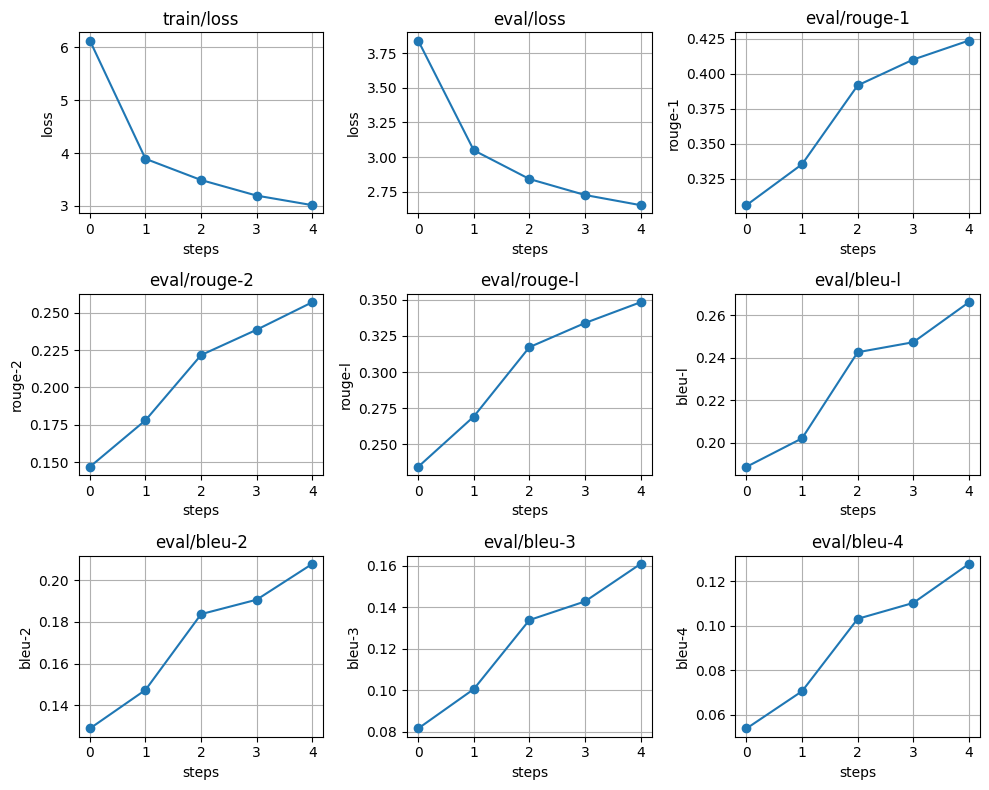

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个新的figure对象，设置其大小
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
# if not isinstance(axs, np.ndarray):
#     axs = [axs]
# 遍历数据字典中的每个键值对
for i, (key, values) in enumerate(train_loss_metric_data.items()):
    row = i // 3  # 计算行索引
    col = i % 3   # 计算列索引
    # 在相应的子图上绘制数据
    # print(values)
    axs[row, col].plot(range(len(values)), values, 'o-')
    axs[row, col].set_title(key)  # 设置子图标题
    axs[row, col].set_xlabel('steps')  # 设置x轴标签
    axs[row, col].set_ylabel(key.split('/')[1])  # 设置y轴标签
    axs[row, col].grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()